In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Preprocessing

In [ ]:
df1 = pd.read_csv('OnlineNewsPopularity.csv')
df2 = df1

In [ ]:
# Finding median of the 'shares' column
df2[' shares'].median()

1500.0

In [ ]:
for row in range(df1.shape[0]):
  if df1[' shares'][row] < 1400:
    df2[' shares'][row] = 0
  else :
    df2[' shares'][row] = 1

# The article with shares more than 1400 are considered popular, else they are labelled unpopular
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1.0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27309,http://mashable.com/2014/06/19/amazon-fire-pho...,203.0,8.0,228.0,0.605505,1.0,0.685714,6.0,2.0,2.0,0.0,5.000000,7.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,436.0,136.400,0.0,843300.0,189714.285714,0.0,4418.057783,2375.916574,40000.0,40000.0,40000.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.028774,0.028579,0.195215,0.028935,0.718498,0.304658,0.121359,0.043860,0.000000,1.000000,0.000000,0.336732,0.100000,0.5,0.000000,0.000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0
27310,http://mashable.com/2014/06/

In [ ]:
# Input variables
# Here the url is ignored in the first column
X = df2.iloc[:,1:-1].values

# Target variable
y = df2.iloc[:,-1].values

In [ ]:
# Splitting data (train:validation:text :: 70:15:15)
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X,y, test_size = 0.15, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp, test_size = 0.1764, random_state = 0)

In [ ]:
# Normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
# Normalising X_valid and Normalising X_test with the same mean and variance used to normalising X_train
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

## Logistic Rgression

In [ ]:
# Training
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Accuracy and the confusion matrix
from sklearn.metrics import confusion_matrix
y_valid_pred = classifier.predict(X_valid)
cm = confusion_matrix(y_valid, y_valid_pred)

print('Accuracy:',classifier.score(X_valid,y_valid))
print('Confusion Matrix', cm)

Accuracy: 0.6578637510513036
Confusion Matrix [[1646 1097]
 [ 937 2265]]


In [ ]:
# Using different regularisation strengths

from sklearn.linear_model import LogisticRegression
from google.colab import widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


accu1 = []
tb2 = widgets.TabBar([str(i) for i in ['C = 0.2','C = 1','C = 5','C = 10']])
C = [0.2,1,5,10]
for i in range(4):
  with tb2.output_to(i):
    # Splitting
    X_temp, X_test, y_temp, y_test = train_test_split(X,y, test_size = 0.15, random_state = 0)
    X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp, test_size = 0.1764, random_state = 0)

    # Normalisation
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_valid = sc.transform(X_valid)

    # Training
    classifier = LogisticRegression(C = C[i])
    classifier.fit(X_train,y_train)

    # Predicting
    y_valid_pred = classifier.predict(X_valid)

    # Error Measurement
    cm = confusion_matrix(y_valid, y_valid_pred)
    accu1.append(classifier.score(X_valid,y_valid))
    print('Accuracy:',classifier.score(X_valid,y_valid))
    print('Confusion Matrix', cm)


# Here different tabs corresponds to different hyperparameters
# In this case it is the Regularisation parameter

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.6582001682085786
Confusion Matrix [[1646 1097]
 [ 935 2267]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.6578637510513036
Confusion Matrix [[1646 1097]
 [ 937 2265]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.6580319596299411
Confusion Matrix [[1647 1096]
 [ 937 2265]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.6580319596299411
Confusion Matrix [[1647 1096]
 [ 937 2265]]


<IPython.core.display.Javascript object>

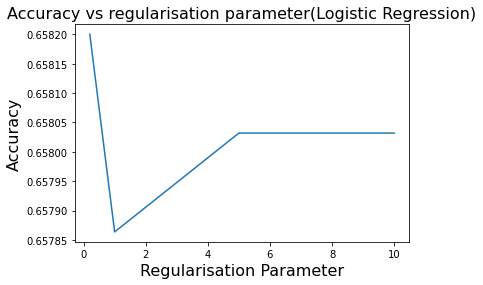

In [ ]:
sb.lineplot(x = [0.2,1,5,10], y = accu1)
plt.xlabel('Regularisation Parameter',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy vs regularisation parameter(Logistic Regression)',fontsize = 16);

## SVC

In [ ]:
# Training
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Accuracy and the confusion matrix
from sklearn.metrics import confusion_matrix
y_valid_pred = classifier.predict(X_valid)
cm = confusion_matrix(y_valid, y_valid_pred)

print('Accuracy:',classifier.score(X_valid,y_valid))
print('Confusion Matrix', cm)

Accuracy: 0.6714886459209419
Confusion Matrix [[1644 1099]
 [ 854 2348]]


In [ ]:
# Using different regularisation strengths

from sklearn.svm import SVC
from google.colab import widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

accu2 = []
tb2 = widgets.TabBar([str(i) for i in ['C = 0.2','C = 1','C = 5','C = 10']])
C = [0.2,1,5,10]
for i in range(4):
  with tb2.output_to(i):
    # Splitting
    X_temp, X_test, y_temp, y_test = train_test_split(X,y, test_size = 0.15, random_state = 0)
    X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp, test_size = 0.1764, random_state = 0)

    # Normalisation
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_valid = sc.transform(X_valid)

    # Training
    classifier = SVC(C = C[i])
    classifier.fit(X_train,y_train)

    # Predicting
    y_valid_pred = classifier.predict(X_valid)

    # Error Measurement
    cm = confusion_matrix(y_valid, y_valid_pred)
    accu2.append(classifier.score(X_valid,y_valid))
    print('Accuracy:',classifier.score(X_valid,y_valid))
    print('Accuracy:',classifier.score(X_valid,y_valid))
    print('Confusion Matrix', cm)


# Here different tabs corresponds to different hyperparameters
# In this case it is the Regularisation parameter

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.6634146341463415
Accuracy: 0.6634146341463415
Confusion Matrix [[1545 1198]
 [ 803 2399]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.6714886459209419
Accuracy: 0.6714886459209419
Confusion Matrix [[1644 1099]
 [ 854 2348]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.6612279226240538
Accuracy: 0.6612279226240538
Confusion Matrix [[1720 1023]
 [ 991 2211]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.6459209419680404
Accuracy: 0.6459209419680404
Confusion Matrix [[1712 1031]
 [1074 2128]]


<IPython.core.display.Javascript object>

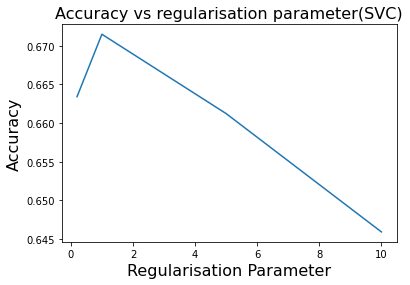

In [ ]:
sb.lineplot(x = [0.2,1,5,10], y = accu2)
plt.xlabel('Regularisation Parameter',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy vs regularisation parameter(SVC)',fontsize = 16);

## Random Forest

In [ ]:
# Training
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Accuracy and the confusion matrix
from sklearn.metrics import confusion_matrix
y_valid_pred = classifier.predict(X_valid)
cm = confusion_matrix(y_valid, y_valid_pred)

print('Accuracy:',classifier.score(X_valid,y_valid))
print('Confusion Matrix', cm)

Accuracy: 0.654541015625
Confusion Matrix [[1034  829]
 [ 586 1647]]


In [ ]:
# Using different number of trees

from sklearn.ensemble import RandomForestClassifier
from google.colab import widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

accu3 = []
tb2 = widgets.TabBar([str(i) for i in ['n_estimators = 10','n_estimators = 50','n_estimators = 100','n_estimators = 300']])
n_estimators = [10,50,100,300]
for i in range(4):
  with tb2.output_to(i):
    # Splitting
    X_temp, X_test, y_temp, y_test = train_test_split(X,y, test_size = 0.15, random_state = 0)
    X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp, test_size = 0.1764, random_state = 0)


    # Training
    classifier = RandomForestClassifier(n_estimators = n_estimators[i])
    classifier.fit(X_train,y_train)
    

    # Predicting
    y_valid_pred = classifier.predict(X_valid)

    # Error Measurement
    cm = confusion_matrix(y_valid, y_valid_pred)
    accu3.append(classifier.score(X_valid,y_valid))
    print('Accuracy:',classifier.score(X_valid,y_valid))
    print('Accuracy:',classifier.score(X_valid,y_valid))
    print('Confusion Matrix', cm)


# Here different tabs corresponds to different hyperparameters
# In this case, it is the number of trees in the forest

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.62158203125
Accuracy: 0.62158203125
Confusion Matrix [[1195  668]
 [ 882 1351]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.65283203125
Accuracy: 0.65283203125
Confusion Matrix [[1039  824]
 [ 598 1635]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.664306640625
Accuracy: 0.664306640625
Confusion Matrix [[1054  809]
 [ 566 1667]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.66845703125
Accuracy: 0.66845703125
Confusion Matrix [[1054  809]
 [ 549 1684]]


<IPython.core.display.Javascript object>

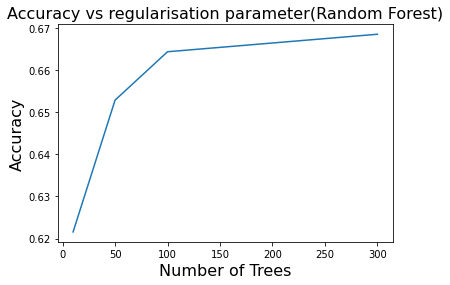

In [ ]:
sb.lineplot(x = [10,50,100,300], y = accu3)
plt.xlabel('Number of Trees',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy vs regularisation parameter(Random Forest)',fontsize = 16);

## NN

In [ ]:
import seaborn as sb
import torch
import torch.nn as nn

In [ ]:
# Setting up the data types and device to be used
dtype = torch.float
device = torch.device("cpu")

In [ ]:
# Dataset module for the dataset
class mydataset(torch.utils.data.Dataset):
  def __init__(self,input,labels):
    super(mydataset,self).__init__()
    self.x = torch.from_numpy(input)
    self.y = torch.from_numpy(labels)
    self.n_samples = self.x.shape[0]

  def __getitem__(self,index):
       return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

In [ ]:
train_data = mydataset(X_train,y_train)
valid_data = mydataset(X_valid,y_valid)
test_data = mydataset(X_test,y_test)

# We want to include the last batch as well so we will set drop_last as False
# We only need shuffle in the train data set as it help with the training
train_loader = torch.utils.data.DataLoader(dataset= train_data, batch_size= 50)
valid_loader = torch.utils.data.DataLoader(dataset= valid_data, batch_size= 50,
                                           shuffle = True, drop_last = False)
test_loader = torch.utils.data.DataLoader(dataset= test_data, batch_size= 50,
                                          shuffle = True, drop_last = False)

In [ ]:
input_size = 59
hidden_size = 4
num_classes = 2


class mymodel(nn.Module):
  def __init__(self,input_size, num_classes,hidden_size=4):
    super(mymodel, self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)
  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out
  
  
model = mymodel(input_size,num_classes,hidden_size)

In [ ]:
# loss and optimizer
learning_rate = 1e-3

criterion = nn.CrossEntropyLoss()
criterion2 = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
# learning loop
n_total_steps = len(train_loader)
num_epochs = 100

train_loss = []
train_accuracy = []
valid_loss = []
valid_accuracy = []

for epoch in range(num_epochs):
  for input, labels in train_loader:

    input = input.to(device) # to push the input to device
    labels = labels.to(device) # to push the labels to device

    # forward pass
    outputs = model.forward(input.float())
    loss = criterion(outputs, labels)
    
    # backward pass
    optimizer.zero_grad() # to empty the value in the gradient attribute
    loss.backward() # for backpropogation
    optimizer.step() # to update the parameters

  # Loss for training set
  with torch.no_grad():
    output_train = model(torch.from_numpy(X_train).float())
    loss_train = criterion(output_train,torch.from_numpy(y_train))

  # Accuracy for training set
  _, predict_train = torch.max(output_train,1)
  n_samples = torch.from_numpy(y_train).shape[0]
  n_correct = (predict_train == torch.from_numpy(y_train)).sum().item()

  train_loss.append(loss_train.item())
  train_accuracy.append(100 * n_correct / n_samples)

  # Loss for validation set
  with torch.no_grad():
    output_valid = model(torch.from_numpy(X_valid).float())
    loss_valid = criterion(output_valid,torch.from_numpy(y_valid))

  # Accuracy for validation set
  _, predict_valid = torch.max(output_valid,1) # not interested in the first value
  n_samples = torch.from_numpy(y_valid).shape[0]
  n_correct = (predict_valid == torch.from_numpy(y_valid)).sum().item()

  
  valid_loss.append(loss_valid.item())
  valid_accuracy.append(100 * n_correct / n_samples)

### 8

#### (a)

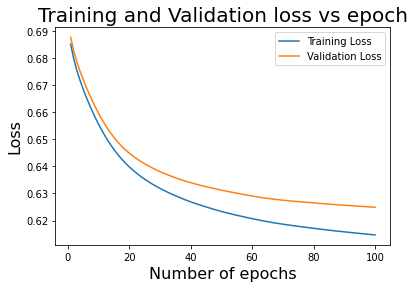

In [ ]:
sb.lineplot(x = range(1,101), y = train_loss)
sb.lineplot(x = range(1,101), y = valid_loss)
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Number of epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Training and Validation loss vs epoch',fontsize = 20);

#### (b)

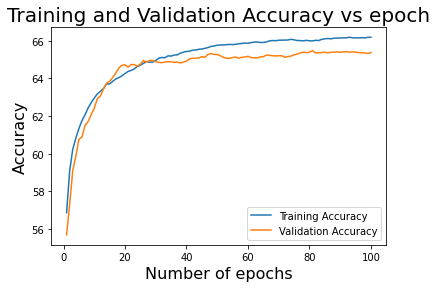

In [ ]:
sb.lineplot(x = range(1,101), y = train_accuracy)
sb.lineplot(x = range(1,101), y = valid_accuracy)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Number of epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Training and Validation Accuracy vs epoch',fontsize = 20);

#### (c)

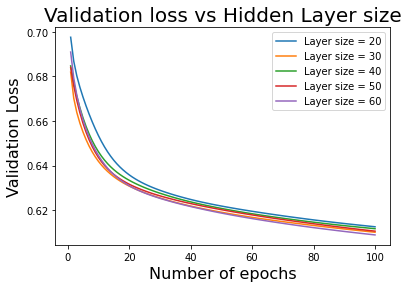

In [ ]:
# Validation Loss vs Hidden layer size

#for hidden_size in [20,30,40,50,60]:
for hidden_size in [20,30,40,50,60]:
  new_model = mymodel(input_size,num_classes,hidden_size)

  # loss and optimizer
  learning_rate = 1e-3
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(new_model.parameters(), lr = learning_rate)

  # learning loop
  n_total_steps = len(train_loader)
  num_epochs = 100
  valid_loss = []

  for epoch in range(num_epochs):
    for input, labels in train_loader:
      input = input.to(device) # to push the input to device
      labels = labels.to(device) # to push the labels to device

      # forward pass
      outputs = new_model.forward(input.float())
      loss = criterion(outputs, labels)
    
    
      # backward pass
      optimizer.zero_grad() # to empty the value in the gradient attribute
      loss.backward() # for backpropogation
      optimizer.step() # to update the parameters


    # Loss for validation set
    with torch.no_grad():
      output_valid = new_model(torch.from_numpy(X_train).float())
      loss_valid = criterion(output_valid,torch.from_numpy(y_train))

  
    valid_loss.append(loss_valid.item())
    
  sb.lineplot(x = range(1,101), y = valid_loss)

plt.legend(['Layer size = 20','Layer size = 30','Layer size = 40','Layer size = 50',
            'Layer size = 60'])
plt.xlabel('Number of epochs',fontsize=16)
plt.ylabel('Validation Loss',fontsize=16)
plt.title('Validation loss vs Hidden Layer size',fontsize = 20);
# Graph shows that the neural network with 60 hidden layers has highest decline 
# in the validation loss (for a common number of epochs)

#### (d)

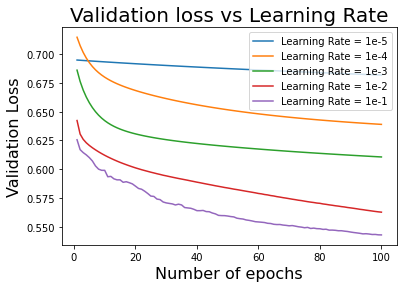

In [ ]:
# Validation Loss vs Learning rate


for learning_rate in [1e-5,1e-4,1e-3,1e-2,1e-1]:
  hidden_size = 60 # best layer size
  new_model = mymodel(input_size,num_classes,hidden_size)

  # loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(new_model.parameters(), lr = learning_rate)

  # learning loop
  n_total_steps = len(train_loader)
  num_epochs = 100
  valid_loss = []

  for epoch in range(num_epochs):
    for input, labels in train_loader:
      input = input.to(device) # to push the input to device
      labels = labels.to(device) # to push the labels to device

      # forward pass
      outputs = new_model.forward(input.float())
      loss = criterion(outputs, labels)
    
    
      # backward pass
      optimizer.zero_grad() # to empty the value in the gradient attribute
      loss.backward() # for backpropogation
      optimizer.step() # to update the parameters


    # Loss for validation set
    with torch.no_grad():
      output_valid = new_model(torch.from_numpy(X_train).float())
      loss_valid = criterion(output_valid,torch.from_numpy(y_train))

  
    valid_loss.append(loss_valid.item())
    #print('epoch: ',epoch+1,'/',num_epochs,'|| Valid loss: ',
    #      np.round(loss_valid.item(),4))
  
  sb.lineplot(x = range(1,101), y = valid_loss)

plt.legend(['Learning Rate = 1e-5','Learning Rate = 1e-4','Learning Rate = 1e-3',
            'Learning Rate = 1e-2','Learning Rate = 1e-1'])
plt.xlabel('Number of epochs',fontsize=16)
plt.ylabel('Validation Loss',fontsize=16)
plt.title('Validation loss vs Learning Rate',fontsize = 20);
# Graph shows that the neural network with learning rate as 1e-1 has highest 
# decline in the validation loss (for a common number of epochs)